In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import MaxPool2D, Conv2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
img_rows = xtrain[0].shape[0]
img_cols = xtrain[0].shape[1]


xtrain = xtrain.reshape(xtrain.shape[0], img_rows, img_cols, 1)
xtest = xtest.reshape(xtest.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

xtrain /= 255.0
xtest /= 255.0

print("xtrain full shape : ", xtrain.shape)
print("xtrain shape : ", xtrain.shape[0])
print("xtest shape : ", xtest.shape[0])

xtrain full shape :  (60000, 28, 28, 1)
xtrain shape :  60000
xtest shape :  10000


In [5]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)


print("Number of classes : ", ytrain.shape[1])

Number of classes :  10


In [6]:
num_classes = ytrain.shape[1]

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation ="relu" , input_shape = input_shape))

model.add(Conv2D(64, (3,3), activation="relu"))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(num_classes, activation="softmax"))

model.compile(loss ='categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
batch_size = 128
epochs = 25

history = model.fit(xtrain,
                    ytrain, 
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (xtest, ytest))

score = model.evaluate(xtest, ytest, verbose=0)
print("Test accuracy : ", score[0])
print("Test loss : ", score[1])



Epoch 1/25
469/469 [==============================] - 16s 16ms/step - loss: 2.1770 - accuracy: 0.3525 - val_loss: 1.9796 - val_accuracy: 0.5599
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 1.4488 - accuracy: 0.7036 - val_loss: 0.8423 - val_accuracy: 0.8223
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.6281 - accuracy: 0.8449 - val_loss: 0.4752 - val_accuracy: 0.8773
Epoch 4/25
469/469 [==============================] - 7s 14ms/step - loss: 0.4450 - accuracy: 0.8776 - val_loss: 0.3884 - val_accuracy: 0.8934
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3855 - accuracy: 0.8902 - val_loss: 0.3498 - val_accuracy: 0.9022
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3541 - accuracy: 0.8981 - val_loss: 0.3264 - val_accuracy: 0.9066
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3331 - accuracy: 0.9035 - val_loss: 0.3099 - val_accuracy: 0.911

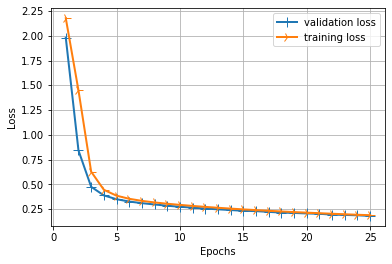

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label="validation loss")
line2 = plt.plot(epochs, loss_values, label = "training loss")
plt.setp(line1, linewidth=2.0, marker="+", markersize=10.0)
plt.setp(line2, linewidth=2.0, marker="4", markersize=10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()